[ 1.80219768e-03 -4.32870842e+02]


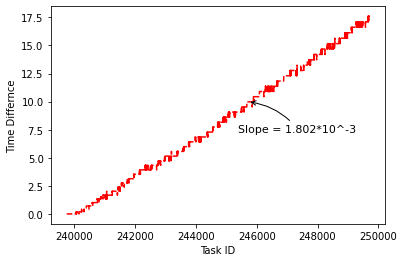

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

df = pd.read_csv("c8.csv")
test=df[["id","received_at","enqueued_at"]]
#test['received_at'] = pd.to_datetime(df['received_at'], format='%Y-%m-%d %H:%M:%S')

#test['enqueued_at'] = pd.to_datetime(df['enqueued_at'], format='%Y-%m-%d %H:%M:%S')
X=test.iloc[:,0].values.reshape(-1,1)
Yr=test.iloc[:,1].values.reshape(-1,1)
Ye=test.iloc[:,2].values.reshape(-1,1)
Yrd=[]
Yed=[]
Yres=[]
Yresn=[]
for i in Yr:
    x=datetime.datetime.strptime(i[0], '%Y-%m-%d %H:%M:%S').timestamp()
    Yrd.append(x)
for i in Ye:
    x=datetime.datetime.strptime(i[0], '%Y-%m-%d %H:%M:%S').timestamp()
    Yed.append(x)
for i in range(len(Yed)):
    diff=Yrd[i]-Yed[i] 
    Yres.append(diff)
temp=[]
Ydiff=[]
temp=[(x-(x**(0.86)))for x in Yres]
tempr=np.array(temp)
Yresnp=np.array(Yres)
x=test.iloc[:,0].values

slope_intercept = np.polyfit(x,tempr,1)
print(slope_intercept)
plt.plot(X,tempr,'r--')
plt.annotate(r'Slope = 1.802*10^-3', 
             xy=(x[4000],tempr[4000]), 
             xycoords='data',
             
             xytext=(-10, -30),
             textcoords='offset points',
             fontsize=11,  
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
            )

plt.ylabel("Time Differnce")
plt.xlabel("Task ID")
plt.show()